# NBA Playoffs
* **See the main project notebook for instructions to be sure you satisfy the rubric!**
* See project 03 for information on the dataset.
* A few example prediction questions to pursue are listed below. However, don't limit yourself to them!
    * Will a player/team make the playoffs this season? (try training on previous year!)
    * Predict players' "playoff performance" based on the regular statistics.
    * Guess the number of games a team will win in a season based on player statistics (need to aggregate statistics to a team-level).


Be careful to justify what information you would know at the "time of prediction" and train your model using only those features.

---
# Summary of Findings

1. Use the dataset you chose in project 03 (NBA, Bike Shares, Elections).
1. Clearly state and frame a prediction problem (classification or regression); choose and justify an objective (e.g. accuracy vs f1-score).
1. Train a "baseline" model with generic set of features created for different kinds of data (e.g. ordinal encoding, one-hot encoding).
1. Engineer at least two new features from the data that improve your baseline model.
1. Create an `sklearn` ML-pipeline; do a search for the best model and parameters using the pipeline.
1. Do an inference analysis on the results (i.e. does my model perform better on attribute X vs Y?).

## Introduction
---
1. State the *prediction problem* you are attempting, if it's a classification or regression problem, explain your choice of target variable and evaluation metric (objective).

**Prediction Problem**: 

The prediction problem we are trying to test is to predict and classify each player on their odds of making the NBA playoffs on the following year. (classification problem)

*Target variable*: A binary that determines if a player makes the playoffs or not. i.e. Playoffs Made

*Evaluation Metric*: Our objective is to maximize our accuracy in predicting if a player will make the playoffs or not. 

Aside from the predictive modeling, a significant amount of the beginning code is used to clean the dataset to arrive at the dataframe that we ideally want. Unlike Project 3, we will not go extensively into the process of cleaning, but will provide a few details.

First, we combined each team's players into a single dataframe. Then, we noticed that there were more than 30 unique teams in the data set (an NBA league has 30 teams). This was because certain team names changed over the years, creating more unique teams. We cleaned this by applying some simple data cleaning. We also added a new column that totalled the amount of times player's team has made the playoffs, as it is an important predictive measurement of whether or not a the player will make the playoffs in the future. Some columns that were not relevant in determining if a player makes the playoffs or not (e.g. season, player index) were dropped.

### Results: Baseline Model
---

1. A summary of the baseline model:
    - The number of features, including how many are quantitative, ordinal, and nominal.
    - The model performance (your evaluation metric) and whether you think this it's good or not (and why).

The baseline model utilizes a large amount of features while using several sk-learn preprocessing techniques to better classify the data. This pipeline model will first pre-process the data using ColumnTransformation, then utilize LinearDiscriminantAnalysis to run predictions for the model.

First, we one-hot-encded the position of the players to better categorize them, because position is an important nominal feature. Secondly, we standardized all of the numerical statistics, seen in `stats`, which includes statistics like minutes played, field goals made, points made, etc. There are a total of 22 columns that were standardized, and all 22 of these columns are quantitiative. Finally, we ran all of preprocessing according to their respective functions. Lastly, we added a binarizer for the age of the players. This seems important, as age can be an important factor in how well a player plays in a team. This results to 25 total features.

After that, we found the score of the respective model which was approximately 0.60, or a 60% accuracy rate of predicting if the player actually made the final the following year. Interpretively, this number seems to be above average. Because 16 teams out of 30 teams make the playoffs every year, on average a blind guess on a random team will return an accuracy rate of 16/30, or 53.33%. Our prediction model improves by roughly 7%, so it is ideal to make some improvements, although we can easily see that there is room for further improvements in our model. For example, if we were able to group based on position, or create new features that aggregates certain columns, we might be able to create improved prediction proportions.


### Results: Final Model
---
1. A summary of the improved model:
    - The features you added and *why* they are good for your data.
    - The model type you chose; the parameters that ended up performing best; the method of model selection used.
    
There were a significant amount of attempted improvements made in the final model. First, we will discuss the functions and classes that were implemented in preparation of the improved model. Then, we will discuss which features were added into the model, and lastly we will discuss the results of the final model.

**1. New Functions and Classes implemented**

First, we implemented StdScalerByGroup, a class that will be used to standardize the quantitiative data depending on the group that it is grouped by. This can be important when grouping by the position of the player. Players in different positions have different statistics, and should be standardized compared to other players in their position, not to all other players in the league. Secondly, implemented a function, "appearance," which will create a new column that counts how many times that team has made the playoffs in that history. Because certain teams can have better facilities, better coaches, or better management, they may be more likely to make the playoffs. This can be a predictive factor in whether or not a player can make the playoffs or not. 

**2. New Features added from the new Functions/Classes**

There were three new features added into the final model. One of them was just discussed earlier: "FreqEnter", which checks how often a team has previously made the playoffs. A team who has historically made the playoffs many times (like the San Antonio Spurs, who have not missed the playoffs in over 20 years) are more likely to make the playoffs the next year.

Another new feature that was added is "Power Ranking", which was modeled after a rating system for players like "player efficiency rating", a rating that is sometimes used to measure a player's potential accomplishments. Becuase the actual formula to calculate the rating is complicated, we simplified the formula so it depends on their points, assists, offensive rebounds, efficient field goal percentage. 

Points is one of the most important metrics, as raw scoring ability is one of the most important ways a player can influence the game, so it was added into the rating system. Similarly, assists can be important in measuring a player's ability to pass or have court vision, which are important measures of a player's "basketball IQ". Offensive rebounds are also incredibly important in getting second chance points for teams, which allows a team to get a second chance if they miss a shot. Lastly, we took into account their eFG%, or efficiency field goal percentage, which measures how efficient their shooting is. Players can score a huge number of points, but if they are incredibly inefficient (low shooting accuracy), then they may not be a good player.

The last feature added is a common statistic called "TS%", which is also called "True Shooting." True shooting percentage is used to take into account a player's field goal shooting rate and their free throw percentage. It is often also measured to show a player's impact and efficiency on the court. 


**3. Interpreting the Results**

1. A summary of the improved model:
    - The features you added and *why* they are good for your data.
    - The model type you chose; the parameters that ended up performing best; the method of model selection used.

After implementing all of these new features, the score of the pipeline jumped up roughly 8%, to approximately 68-70%. 

We chose LinearDiscriminantAnalysis as our model because LDA is a strong classification model, and was taught in another theory class (MATH 189). LDA also depends on the data being approximately gaussian, otherwise the prediction is significantly weaker. However we can account for this by standardizing the data. Because the prediction rate is quite high, we can also approximate that much of our data is approximately gaussian as well.

We would argue that ~68% is a good performance for our model. There is a lot of variance when it comes to when NBA teams make the playoffs or not, and many times it can come down to factors that are difficult to measure--injuries or lack of team chemistry when a player moves teams. Because of how difficult it can be to account for these outside factors, we would argue that a ~68% rate is quite strong. To check if 68% is a good predictor, we went on famous predictive modeling website FiveThirtyEight and checked their predictions on who would make the playoffs in the beginning of the season. They made 11/16 correct picks, which results to 68.75% accuracy -- a very similar rate to ours. 

If we were to improve in the future, we would ideally want to give more weight to teams instead of the player. Basketball is a team game. Even though legendary players like Lebron James could theoretically will teams to the playoffs, they are not able to do it every time, like the 2018-2019 Lakers team where Lebron James missed the playoffs. 


### Results: Fairness Evaluation
---
1. Evaluate your model for "fairness" on an interesting subset of the data using a permutation test. Justify the parity measure you are using.

First, we calculated all of the relevant fairness metrics of the data. One interesting subset of the data is whether or not the position of a player is a Power Forward. To do this, we checked if a player was a power forward or not, and then added a new column to the dataframe. This will be used for the permutation test in the future.

We used two parity measures for this test. One is accuracy, and the other is recall. We want to access if the model is biased towards power forwards or non-power forwards.

Once we created the is_pf column, we shuffled it to begin the permutation testing. We permuted it 100 times, and every time we shuffled the column that indicates if theplayer is a pf or not, we generated a distribution of the accruacy level. The distribution was created by comparing the two means of of the distributions. Once we created the distributions, we can check where the observed value is relative to the distribution, and calculate the p-value. We did this process for both accuracy and for recall, and for both distributions the p values were high enough where we failed to reject the null hypothesis. Therefore, we concluded that there is not significant bias in our data.

# Your Code Starts Here

In [1171]:
%matplotlib inline
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plot
import seaborn as sns

In [1172]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Results: Baseline Model
---

In [1173]:
#create three lists to store nba data seperately from 2012 to 2018
all_regular = []
all_playoff = []
all_seasons_combined = []
for i in range(2012, 2019):
    #get the regular season from each year
    reg_season = pd.read_html('https://www.basketball-reference.com/leagues/NBA_' + str(i) + '_per_game.html')
    #filter out non sense data
    reg_season[0] =reg_season[0].loc[reg_season[0]['Player'] != 'Player']
    #add the season to the season list
    all_regular.append(reg_season[0])
    #get the playoff from each year
    playoffs = pd.read_html('https://www.basketball-reference.com/playoffs/NBA_' + str(i) + '_totals.html')
    #filter out non sense data
    playoffs[0] =playoffs[0].loc[playoffs[0]['Player'] != 'Player']    
    #add the season to the season list
    all_playoff.append(playoffs[0])
    #combine the two 
    combined = pd.merge(reg_season[0], playoffs[0], on = 'Player', how = 'left', suffixes = ("_reg", "_playoff"))
    #add the season year
    combined['Season'] = i
    #append it to the list
    all_seasons_combined.append(combined)


In [1174]:
# Use "teams" to add a new column in the combined dataframe if the player made the playoffs that year
year = 2012
for i in all_seasons_combined:
    i['playoff_made'] = np.where(i['Tm_reg'].isin(teams[year]), True, False)
    year += 1

In [1175]:
#concat all the combined to a single dataframe 
result = pd.concat(all_seasons_combined)
#save the dataframe locally
result.to_csv('All Seasons.csv', encoding='utf-8', index=False)

In [1176]:
#read the data from the saved csv file
nba = pd.read_csv("All Seasons.csv")
nba.head()

,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,...,DRB_playoff,TRB_playoff,AST_playoff,STL_playoff,BLK_playoff,TOV_playoff,PF_playoff,PTS_playoff,Season,playoff_made
0,1,Jeff Adrien,PF,25,HOU,8,0,7.9,0.9,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,False
1,2,Arron Afflalo,SG,26,DEN,62,62,33.6,5.3,11.3,...,20.0,25.0,19.0,5.0,2.0,9.0,14.0,76.0,2012,True
2,3,Blake Ahearn,PG,27,UTA,4,0,7.5,1.0,3.5,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,2012,True
3,4,Solomon Alabi,C,23,TOR,14,0,8.7,0.9,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,False
4,5,Cole Aldrich,C,23,OKC,26,0,6.7,0.8,1.6,...,8.0,13.0,0.0,0.0,0.0,0.0,3.0,10.0,2012,True


In [1177]:
# Drop TOT because it is an actual team. It exists if a player played across different teams in the same season, and records that 
# player's aggregate statistics.
nba = nba[nba['Tm_reg'] != 'TOT'].reset_index(drop = True)

In [1178]:
#need tp convert CHO to CHA since CHO changed to CHA after 2014
#since Charlotte changed their team name we need to combine CHO and CHA
for i in nba.columns.to_list():
    nba[i] = nba[i].apply(lambda x : 'CHA' if x == 'CHO' else x)

In [1179]:
#need tp convert CHO to CHA since CHO changed to CHA after 2014
#since Charlotte changed their team name we need to combine CHO and CHA
for i in nba.columns.to_list():
    nba[i] = nba[i].apply(lambda x : 'NOP' if x == 'NOH' else x)

In [1180]:
#need tp convert CHO to CHA since CHO changed to CHA after 2014
#since Charlotte changed their team name we need to combine CHO and CHA
for i in nba.columns.to_list():
    nba[i] = nba[i].apply(lambda x : 'NJN' if x == 'BRK' else x)

In [1181]:
#grab all the teams that made the playoffs in each season
dic = {}
for i in range(len(all_playoff)):
    dic[i + 2012] = all_playoff[i]['Tm'].unique()
#put the dictionary into a dataframe
teams = pd.DataFrame(data = dic)
teams.head()

,2012,2013,2014,2015,2016,2017,2018
0,DEN,MIA,OKC,MEM,OKC,OKC,OKC
1,UTA,MEM,POR,POR,LAC,SAS,MIA
2,OKC,HOU,IND,NOP,SAS,IND,SAS
3,PHI,NYK,MIA,DAL,IND,POR,POR
4,BOS,IND,MEM,BRK,MEM,HOU,PHI


In [1182]:
#need tp convert CHO to CHA since CHO changed to CHA after 2014
#since Charlotte changed their team name we need to combine CHO and CHA
for i in teams.columns.to_list():
    teams[i] = teams[i].apply(lambda x : 'CHA' if x == 'CHO' else x)

In [1183]:
#need tp convert CHO to CHA since CHO changed to CHA after 2014
#since Charlotte changed their team name we need to combine CHO and CHA
for i in teams.columns.to_list():
    teams[i] = teams[i].apply(lambda x : 'NOP' if x == 'NOH' else x)

In [1184]:
#need tp convert CHO to CHA since CHO changed to CHA after 2014
#since Charlotte changed their team name we need to combine CHO and CHA
for i in teams.columns.to_list():
    teams[i] = teams[i].apply(lambda x : 'NJN' if x == 'BRK' else x)

In [1185]:
#grab Year 2018 as testing dataset for building the model
year_2018 = nba.loc[nba['Season'] == 2018]
for i in year_2018.columns.to_list():
    if '_playoff' in i:
        year_2018 = year_2018.drop(i, axis = 1)
    else:
        continue
year_2018 = year_2018.reset_index(drop=True)
year_2018 = year_2018.fillna(0)
year_2018.head()

,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,...,DRB_reg,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg,Season,playoff_made
0,1,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018,True
1,2,Quincy Acy,PF,27,NJN,70,8,19.4,1.9,5.2,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018,False
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018,True
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018,True
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,False


In [1186]:
#build X testing for building up the model
X_test = year_2018.drop(['Rk_reg','Player','Tm_reg','Season','playoff_made'], axis = 1)
X_test.head()

,Pos_reg,Age_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,FG%_reg,3P_reg,3PA_reg,...,FT%_reg,ORB_reg,DRB_reg,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg
0,SG,24,75,8,15.1,1.5,3.9,0.395,1.1,2.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,PF,27,70,8,19.4,1.9,5.2,0.356,1.5,4.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,C,24,76,76,32.7,5.9,9.4,0.629,0.0,0.0,...,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,C,20,69,19,19.8,2.5,4.9,0.512,0.0,0.1,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,SG,32,53,3,12.9,1.2,3.1,0.401,0.5,1.3,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [1187]:
#build Y testing for fitting the model's params
Y_test = year_2018.playoff_made
Y_test.head()

0     True
1    False
2     True
3     True
4    False
Name: playoff_made, dtype: bool

In [1188]:
#grab training sets
other_years = nba.loc[nba['Season'] != 2018]
for i in other_years.columns.to_list():
    if '_playoff' in i:
        other_years = other_years.drop(i, axis = 1)
    else:
        continue
other_years = other_years.reset_index(drop=True)
other_years = other_years.fillna(0)
other_years.head()

,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,...,DRB_reg,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg,Season,playoff_made
0,1,Jeff Adrien,PF,25,HOU,8,0,7.9,0.9,2.0,...,2.1,2.8,0.1,0.0,0.3,0.3,1.6,2.6,2012,False
1,2,Arron Afflalo,SG,26,DEN,62,62,33.6,5.3,11.3,...,2.5,3.2,2.4,0.6,0.2,1.4,2.2,15.2,2012,True
2,3,Blake Ahearn,PG,27,UTA,4,0,7.5,1.0,3.5,...,0.5,0.5,0.3,0.0,0.0,1.3,1.0,2.5,2012,True
3,4,Solomon Alabi,C,23,TOR,14,0,8.7,0.9,2.6,...,2.3,3.4,0.2,0.1,0.6,0.4,0.8,2.4,2012,False
4,5,Cole Aldrich,C,23,OKC,26,0,6.7,0.8,1.6,...,1.3,1.8,0.1,0.3,0.6,0.3,0.8,2.2,2012,True


In [1189]:
#grab x test
X_train = other_years.drop(['Rk_reg','Player','Tm_reg','Season','playoff_made'], axis = 1)
X_train.head()

,Pos_reg,Age_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,FG%_reg,3P_reg,3PA_reg,...,FT%_reg,ORB_reg,DRB_reg,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg
0,PF,25,8,0,7.9,0.9,2.0,0.438,0.0,0.0,...,0.583,0.6,2.1,2.8,0.1,0.0,0.3,0.3,1.6,2.6
1,SG,26,62,62,33.6,5.3,11.3,0.471,1.4,3.6,...,0.798,0.6,2.5,3.2,2.4,0.6,0.2,1.4,2.2,15.2
2,PG,27,4,0,7.5,1.0,3.5,0.286,0.5,2.3,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,1.3,1.0,2.5
3,C,23,14,0,8.7,0.9,2.6,0.361,0.0,0.0,...,0.875,1.1,2.3,3.4,0.2,0.1,0.6,0.4,0.8,2.4
4,C,23,26,0,6.7,0.8,1.6,0.524,0.0,0.0,...,0.929,0.5,1.3,1.8,0.1,0.3,0.6,0.3,0.8,2.2


In [1190]:
#build Y test for fitting the model's params
Y_train = other_years.playoff_made
Y_train.head()

0    False
1     True
2     True
3    False
4     True
Name: playoff_made, dtype: bool

In [1192]:
#transform the Position column
pos_encode = ['Pos_reg']
one_hot_encode = Pipeline(steps = [('one-hot-encode', OneHotEncoder())])
#binarize age column
age = ['Age_reg']
binarizer_age = Pipeline(steps = [('binarize-age', Binarizer(threshold = 28))])
#standize field goals, ft percentage, blocks, pts, assists, and steals column
stats = ['G_reg', 'GS_reg', 'MP_reg', 'FG_reg', 'FG%_reg', 'FGA_reg', '3P_reg', '3PA_reg', 
         '3P%_reg', '2P_reg', '2PA_reg','2P%_reg', 'eFG%_reg', 'FTA_reg', 'FT%_reg',
         'ORB_reg', 'DRB_reg', 'TRB_reg', 'AST_reg', 'TOV_reg', 'PF_reg', 'PTS_reg']
std_stats = Pipeline(steps = [('standardize-stats', StandardScaler())])
#pre process all the columns
preproc = ColumnTransformer(transformers=[('one-hot-encode', one_hot_encode, pos_encode), 
                                          ('binarize-age', binarizer_age, age),                                       
                                          ('standardize-stats',std_stats, stats)])
#choose LDA to predict our model
pl = Pipeline(steps=[('preprocessor', preproc), ('LDA', LinearDiscriminantAnalysis())])
pl.fit(X_train, Y_train)
pl.score(X_test, Y_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.6

As we see, a baseline model does not predict wether a player made the playoff well enough. This is kind of what we expected because we really just used default code as our explanotory variables. We didn't properly group the players...
Note: when predicting whether the player made playoff, we don't take the player's team into account(maybe we can do something about it)

### Results: Final Model
---

We could add a new feature that indicates wether the team is more frequently to make to playoffs in the past 7 years.
We could also make a new feature that summarize the player's overall rating/power ranking by putting weights on different stats.

In [1193]:
useful_data = nba
for i in useful_data.columns.to_list():
    if '_playoff' in i:
        useful_data = useful_data.drop(i, axis = 1)
    else:
        continue
useful_data = useful_data.reset_index(drop=True)
useful_data = useful_data.fillna(0)
useful_data.head()

,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,...,DRB_reg,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg,Season,playoff_made
0,1,Jeff Adrien,PF,25,HOU,8,0,7.9,0.9,2.0,...,2.1,2.8,0.1,0.0,0.3,0.3,1.6,2.6,2012,False
1,2,Arron Afflalo,SG,26,DEN,62,62,33.6,5.3,11.3,...,2.5,3.2,2.4,0.6,0.2,1.4,2.2,15.2,2012,True
2,3,Blake Ahearn,PG,27,UTA,4,0,7.5,1.0,3.5,...,0.5,0.5,0.3,0.0,0.0,1.3,1.0,2.5,2012,True
3,4,Solomon Alabi,C,23,TOR,14,0,8.7,0.9,2.6,...,2.3,3.4,0.2,0.1,0.6,0.4,0.8,2.4,2012,False
4,5,Cole Aldrich,C,23,OKC,26,0,6.7,0.8,1.6,...,1.3,1.8,0.1,0.3,0.6,0.3,0.8,2.2,2012,True


In [1194]:
from sklearn.base import BaseEstimator, TransformerMixin

#create a new Class to standardize infor based on groups
class StdScalerByGroup(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        
        # X may not be a pandas dataframe (e.g. a np.array)
        df = pd.DataFrame(X)
        
        # A dictionary of means/standard-deviations for each column, for each group.
        self.grps_ = X.groupby(X.columns[0]).agg(['mean', 'std']).to_dict()

        return self

    def transform(self, X, y=None):
        
        try:
            getattr(self, "grps_")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")
        

        # Define a helper function here?
        def trans_cols(inner_column):
            #grab the inner column name(A, B or C)
            col_name = inner_column.name
            def standard_deviation(outer_column):
                #grab the outer column name(C1 or C2)
                group_name = outer_column.name                
                #grab the mean and std from the dict
                mean = self.grps_[(group_name, 'mean')][col_name]
                std = self.grps_[(group_name, 'std')][col_name]                
                return (outer_column - mean)/std
            return inner_column.apply(standard_deviation)
        
        # X may not be a dataframe (e.g. np.array)
        df = pd.DataFrame(X)
        df = df.groupby(df.columns[0]).apply(trans_cols)
        return df 

In [1195]:
#count the number of appearances throughout all seasons
count_team = {}
def appearance(team):
    count_team[team] = count_team.get(team, 0) + 1
#loop through all the columns and count
for i in list(teams.columns):
    teams[i].apply(appearance)
count_team = pd.Series(count_team)
#get all teams appeared in the playoffs at least once
count_team = pd.DataFrame(data = count_team).sort_values(0, ascending = False)
#change team column name
count_team.rename(columns={0:'count'} ,inplace=True)
count_team_dict =count_team['count'].to_dict()

# Adding first new feature

In [1196]:
#add first new feature that calculates the number of times that team made to playoffs
useful_data['FreqEnter'] = useful_data['Tm_reg'].apply(lambda x : count_team_dict.get(x, 0))
useful_data.head()

,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,...,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg,Season,playoff_made,FreqEnter
0,1,Jeff Adrien,PF,25,HOU,8,0,7.9,0.9,2.0,...,2.8,0.1,0.0,0.3,0.3,1.6,2.6,2012,False,6
1,2,Arron Afflalo,SG,26,DEN,62,62,33.6,5.3,11.3,...,3.2,2.4,0.6,0.2,1.4,2.2,15.2,2012,True,2
2,3,Blake Ahearn,PG,27,UTA,4,0,7.5,1.0,3.5,...,0.5,0.3,0.0,0.0,1.3,1.0,2.5,2012,True,3
3,4,Solomon Alabi,C,23,TOR,14,0,8.7,0.9,2.6,...,3.4,0.2,0.1,0.6,0.4,0.8,2.4,2012,False,5
4,5,Cole Aldrich,C,23,OKC,26,0,6.7,0.8,1.6,...,1.8,0.1,0.3,0.6,0.3,0.8,2.2,2012,True,6


# Adding second new feature

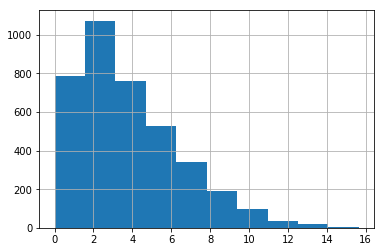

In [1197]:
#we can add a new column that calculates the player's power ranking
useful_data['PowerRanking'] = useful_data['PTS_reg'] * 0.4 + useful_data['AST_reg'] * 0.25 +\
        useful_data['ORB_reg'] * 0.2 + useful_data['eFG%_reg'] * 0.15
useful_data['PowerRanking'].hist()

# Adding third new feature 

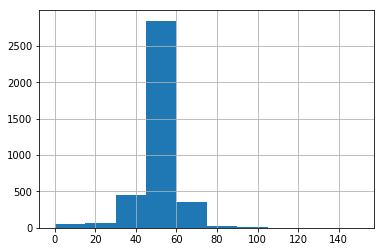

In [1198]:
#create True shooting percentage column
useful_data['TS%_reg'] = useful_data['PTS_reg'] / (2 * ( useful_data['FGA_reg'] + (0.44 * useful_data['FTA_reg'])))
useful_data['TS%_reg'] = useful_data['TS%_reg'] * 100
useful_data['TS%_reg'].hist()

In [1199]:
#grab training sets
other_years = useful_data.loc[useful_data['Season'] != 2018]
other_years = other_years.reset_index(drop=True)
other_years = other_years.fillna(0)

In [1200]:
#grab x train
X_new_train = other_years.drop(['Rk_reg','Player','Tm_reg','Season','playoff_made'], axis = 1)
X_new_train.head()

,Pos_reg,Age_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,FG%_reg,3P_reg,3PA_reg,...,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg,FreqEnter,PowerRanking,TS%_reg
0,PF,25,8,0,7.9,0.9,2.0,0.438,0.0,0.0,...,2.8,0.1,0.0,0.3,0.3,1.6,2.6,6,1.25070,48.872180
1,SG,26,62,62,33.6,5.3,11.3,0.471,1.4,3.6,...,3.2,2.4,0.6,0.2,1.4,2.2,15.2,2,6.88010,58.192956
2,PG,27,4,0,7.5,1.0,3.5,0.286,0.5,2.3,...,0.5,0.3,0.0,0.0,1.3,1.0,2.5,3,1.12855,35.714286
3,C,23,14,0,8.7,0.9,2.6,0.361,0.0,0.0,...,3.4,0.2,0.1,0.6,0.4,0.8,2.4,5,1.28415,41.899441
4,C,23,26,0,6.7,0.8,1.6,0.524,0.0,0.0,...,1.8,0.1,0.3,0.6,0.3,0.8,2.2,6,1.08360,60.439560


In [1201]:
#grab y train
Y_new_train = other_years['playoff_made']
Y_new_train.head()

0    False
1     True
2     True
3    False
4     True
Name: playoff_made, dtype: bool

In [1202]:
#grab training sets
year_2018 = useful_data.loc[useful_data['Season'] == 2018]
year_2018 = year_2018.reset_index(drop=True)
year_2018 = year_2018.fillna(0)
year_2018.head()

,Rk_reg,Player,Pos_reg,Age_reg,Tm_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,...,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg,Season,playoff_made,FreqEnter,PowerRanking,TS%_reg
0,1,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.5,0.1,0.3,1.7,4.7,2018,True,6,2.12100,56.436119
1,2,Quincy Acy,PF,27,NJN,70,8,19.4,1.9,5.2,...,0.5,0.4,0.9,2.1,5.9,2018,False,3,2.75440,52.716226
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,1.2,1.0,1.7,2.8,13.9,2018,True,6,6.97435,62.770954
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,0.5,0.6,1.0,2.0,6.9,2018,True,5,3.55180,57.081403
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.1,0.2,0.4,1.1,3.4,2018,False,1,1.60275,51.204819


In [1203]:
#grab x test
X_new_test = year_2018.drop(['Rk_reg','Player','Tm_reg','Season','playoff_made'], axis = 1)
X_new_test.head()

,Pos_reg,Age_reg,G_reg,GS_reg,MP_reg,FG_reg,FGA_reg,FG%_reg,3P_reg,3PA_reg,...,TRB_reg,AST_reg,STL_reg,BLK_reg,TOV_reg,PF_reg,PTS_reg,FreqEnter,PowerRanking,TS%_reg
0,SG,24,75,8,15.1,1.5,3.9,0.395,1.1,2.9,...,1.5,0.4,0.5,0.1,0.3,1.7,4.7,6,2.12100,56.436119
1,PF,27,70,8,19.4,1.9,5.2,0.356,1.5,4.2,...,3.7,0.8,0.5,0.4,0.9,2.1,5.9,3,2.75440,52.716226
2,C,24,76,76,32.7,5.9,9.4,0.629,0.0,0.0,...,9.0,1.2,1.2,1.0,1.7,2.8,13.9,6,6.97435,62.770954
3,C,20,69,19,19.8,2.5,4.9,0.512,0.0,0.1,...,5.5,1.5,0.5,0.6,1.0,2.0,6.9,5,3.55180,57.081403
4,SG,32,53,3,12.9,1.2,3.1,0.401,0.5,1.3,...,1.2,0.6,0.1,0.2,0.4,1.1,3.4,1,1.60275,51.204819


In [1204]:
#grab y test
Y_new_test = year_2018['playoff_made']
Y_new_test.head()

0     True
1    False
2     True
3     True
4    False
Name: playoff_made, dtype: bool

In [1275]:
#transform the Position column
pos_encode = ['Pos_reg']
one_hot_encode = Pipeline(steps = [('one-hot-encode', OneHotEncoder())])
#binarize age column
age = ['Age_reg']
binarizer_age = Pipeline(steps = [('binarize-age', Binarizer(threshold = 30))])
#binarize the freq enter column
freq = ['FreqEnter']
binarizer_enter = Pipeline(steps = [('binarize-enter', Binarizer(threshold = 3))])
#binarize true shooting percentage column
tsp = ['TS%_reg']
binarizer_ts = Pipeline(steps = [('binarize-ts%', Binarizer(threshold = 53))])
#standardize PR
scaler_stats = ['Pos_reg', 'PowerRanking']
st_scaler = Pipeline([('group-by-pos', StdScalerByGroup())]) 
#preprocess all the columns
preproc = ColumnTransformer(transformers=[('one-hot-encode', one_hot_encode, pos_encode), 
                                          ('binarize-age', binarizer_age, age),                                       
                                          ('binarize-enter', binarizer_enter, freq),
                                          ('binarize-ts%', binarizer_ts, freq),
                                          ('std_scaler', st_scaler, scaler_stats)])
#choose LDA to predict our model
pl = Pipeline(steps=[('preprocessor', preproc), ('LDA', LinearDiscriminantAnalysis())])
pl.fit(X_new_train, Y_new_train)
pl.score(X_new_test, Y_new_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.6793388429752066

### Results: Fairness Evaluation
---

In [1276]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [1224]:
#get the predictions from the model
preds = pl.predict(X_new_test)

In [1225]:
# proportion of predictions that are correct
metrics.accuracy_score(Y_new_test, preds)

0.6181818181818182

In [1226]:
# Counts of TN / FP / FN / TP
metrics.confusion_matrix(Y_new_test, preds)

array([[248,  46],
       [185, 126]])

In [1227]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_new_test, preds).ravel()
tn, fp, fn, tp

(248, 46, 185, 126)

In [1228]:
# Recall: proportion of players made playoffs that were correctly identified
# What is the effect of the misses here?
metrics.recall_score(Y_new_test, preds)

0.40514469453376206

In [1229]:
# Specificity: proportion of players that didn't make playoffs correctly identified
# What is the effect of the misses here?

# Note: specificity = recall of the negative class
metrics.recall_score(Y_new_test, preds, pos_label=0)

0.8435374149659864

In [1230]:
# Precision: proportion of predicted players made playoffs that actually made playoffs
metrics.precision_score(Y_new_test, preds)

0.7325581395348837

In [1231]:
# FDR: proportion of predicted players made playoffs that actually didn't make playoffs
1 - metrics.precision_score(Y_new_test, preds)

0.2674418604651163

# Parity Measures

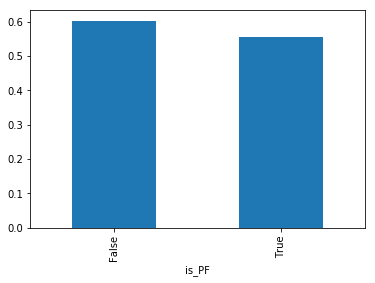

In [1232]:
results = X_new_test
#add a new column to be the specifier 
#check whether a player is a PF
results['is_PF'] = results['Pos_reg'].apply(lambda x : True if x == 'PF' else False)
results['prediction'] = preds
results['true_made_playoff'] = Y_new_test

(
    results
    .groupby('is_PF')
    .apply(lambda x:1 - metrics.recall_score(x.true_made_playoff, x.prediction))
    .plot(kind='bar')
)

In [1233]:
#set the significance level
alpha = 0.01

In [1234]:
#to see wether two groups have the same distributions, we run permutation tests
#we conduct accuracy purity measures
obs = results.groupby('is_PF').apply(lambda x: metrics.accuracy_score(x.true_made_playoff, x.prediction)).diff().iloc[-1]

metrs = []
for _ in range(100):
    s = (
        results[['is_PF', 'prediction', 'true_made_playoff']]
        .assign(is_PF = results.is_PF.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_PF')
        .apply(lambda x: metrics.accuracy_score(x.true_made_playoff, x.prediction))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)

0.8


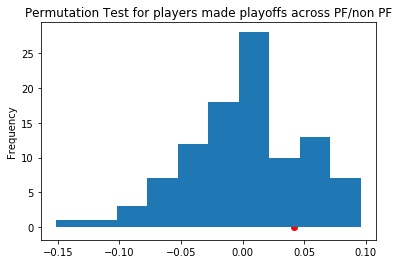

In [1235]:
print(pd.Series(metrs <= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for players made playoffs across PF/non PF')
plt.scatter(obs, 0, c='r');

In [1236]:
(
    results
    .groupby('is_PF')
    .apply(lambda x: metrics.recall_score(x.true_made_playoff, x.prediction))
    .rename('recall')
    .to_frame()
)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,recall
is_PF,
False,0.396887
True,0.444444


In [1237]:
obs = results.groupby('is_PF').apply(lambda x: metrics.recall_score(x.true_made_playoff, x.prediction)).diff().iloc[-1]

metrs = []
for _ in range(100):
    s = (
        results[['is_PF', 'prediction', 'true_made_playoff']]
        .assign(is_PF = results.true_made_playoff.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_PF')
        .apply(lambda x: metrics.recall_score(x.true_made_playoff, x.prediction))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)


0.84


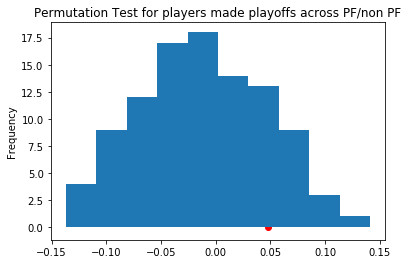

In [1238]:
print(pd.Series(metrs <= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for players made playoffs across PF/non PF')
plt.scatter(obs, 0, c='r');